# Data Structures and Algorithms - Basic

In [5]:
import ipytest
import pytest

ipytest.autoconfig()

## Sorting

### Selection Sort
| Stable(?) | Time | Space |
|----------|----------|----------|
| N | $O(n^2)$ | $O(1)$ |

In [8]:
%%ipytest


def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        if min_idx != i:
            arr[i], arr[min_idx] = arr[min_idx], arr[i]


def test_selection_sort():
    arr = [64, 34, 25, 12, 22, 11, 90]
    selection_sort(arr)
    assert arr == [11, 12, 22, 25, 34, 64, 90]

.                                                                                            [100%]
1 passed in 0.01s


### Bubble Sort
| Stable(?) | Time | Space |
|----------|----------|----------|
| Y | $O(n^2)$ | $O(1)$ |

In [9]:
%%ipytest


def bubble_sort(arr):
    for i in range(len(arr)):
        swapped = False
        for j in range(len(arr) - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break


def test_bubble_sort():
    arr = [64, 34, 25, 12, 22, 11, 90]
    bubble_sort(arr)
    assert arr == [11, 12, 22, 25, 34, 64, 90]

.                                                                                            [100%]
1 passed in 0.00s


### Insertion Sort
| Stable(?) | Time | Space |
|----------|----------|----------|
| Y | $O(n^2)$ | $O(1)$ |

In [10]:
%%ipytest


def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key


def test_insertion_sort():
    arr = [64, 34, 25, 12, 22, 11, 90]
    insertion_sort(arr)
    assert arr == [11, 12, 22, 25, 34, 64, 90]

.                                                                                            [100%]
1 passed in 0.00s


### Merge Sort
| Stable(?) | Time | Space |
|----------|----------|----------|
| Y | $O(n \log n)$ | $O(n)$ |

In [11]:
%%ipytest


def merge_sort(arr):
    if len(arr) <= 1:
        return
    m = len(arr) // 2
    left = arr[:m]
    right = arr[m:]
    merge_sort(left)
    merge_sort(right)

    i, j, k = 0, 0, 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1


def test_merge_sort():
    arr = [64, 34, 25, 12, 22, 11, 90]
    merge_sort(arr)
    assert arr == [11, 12, 22, 25, 34, 64, 90]

.                                                                                            [100%]
1 passed in 0.00s


#### Smaller Sum Problem

In [18]:
%%ipytest


def compute_smaller_sum(arr):
    s = 0
    if len(arr) <= 1:
        return s
    m = len(arr) // 2
    left = arr[:m]
    right = arr[m:]
    s += small_sum(left)
    s += small_sum(right)

    i, j, k = 0, 0, 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            s += left[i] * (len(right) - j)
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1

    return s


def test_compute_small_sum():
    arr = [2, 4, 5, 1, 7, 3]
    s = compute_smaller_sum(arr)
    assert s == 23

.                                                                                            [100%]
1 passed in 0.00s


#### Inversion Pair Problem

In [20]:
%%ipytest


def count_inversion_pairs(arr):
    if len(arr) <= 1:
        return 0
    count = 0
    m = len(arr) // 2
    left = arr[:m]
    right = arr[m:]
    count += count_inversion_pairs(left)
    count += count_inversion_pairs(right)

    i, j, k = 0, 0, 0
    while i < len(left) and j < len(right):
        if left[i] > right[j]:
            arr[k] = right[j]
            j += 1
            count += len(left) - i
        else:
            arr[k] = left[i]
            i += 1
        k += 1
    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1

    return count


def test_count_inversion_pairs():
    arr = [9, 7, 5, 4, 6]
    count = count_inversion_pairs(arr)
    assert count == 8

.                                                                                            [100%]
1 passed in 0.00s


### Heap And Heap Sort

#### Heap

In [29]:
%%ipytest


class Heap:
    def __init__(self, arr=None, heap_type="min"):
        self._heap_type = heap_type
        if arr:
            self._size = len(arr)
            self._heap = arr
            for i in range(self._size // 2 - 1, -1, -1):
                self.down(i)
        else:
            self._size = 0
            self._heap = []

    @staticmethod
    def parent(i):
        return (i - 1) // 2

    @staticmethod
    def left(i):
        return 2 * i + 1

    @staticmethod
    def right(i):
        return 2 * i + 2

    def swap(self, i, j):
        self._heap[i], self._heap[j] = self._heap[j], self._heap[i]

    def compare(self, i, j):
        if self._heap_type == "min":
            return self._heap[i] < self._heap[j]
        else:
            return self._heap[i] > self._heap[j]

    def push(self, k):
        if len(self._heap) == self._size:
            self._heap.append(k)
        else:
            self._heap[self._size] = k
        self.up(self._size)
        self._size += 1

    def pop(self):
        if self._size == 0:
            return None
        top = self._heap[0]
        self._size -= 1
        self._heap[0] = self._heap[self._size]
        self.down(0)
        return top

    def up(self, i):
        while i > 0:
            p = Heap.parent(i)
            if self.compare(i, p):
                self.swap(i, p)
            else:
                break
            i = p

    def down(self, p):
        while p < self._size:
            idx = p
            l, r = Heap.left(p), Heap.right(p)
            if l < self._size and self.compare(l, idx):
                idx = l
            if r < self._size and self.compare(r, idx):
                idx = r
            if idx == p:
                break
            self.swap(p, idx)
            p = idx


@pytest.fixture
def heap():
    return Heap()


def test_push_single_element(heap):
    heap.push(10)
    assert heap._heap[0] == 10
    assert heap._size == 1


def test_push_multiple_elements(heap):
    elements = [5, 3, 8, 1, 9, 2]
    for el in elements:
        heap.push(el)

    assert heap._heap[0] == min(elements)
    assert heap._size == len(elements)


def test_pop_single_element(heap):
    heap.push(10)
    assert heap.pop() == 10
    assert heap._size == 0


def test_pop_multiple_elements(heap):
    elements = [5, 3, 8, 1, 9, 2]
    for el in elements:
        heap.push(el)

    sorted_elements = sorted(elements)
    for expected in sorted_elements:
        assert heap.pop() == expected

    assert heap._size == 0


def test_heap_property(heap):
    elements = [10, 4, 7, 1, 3, 5, 9]
    for el in elements:
        heap.push(el)

    sorted_elements = []
    while heap._size > 0:
        sorted_elements.append(heap.pop())

    assert sorted_elements == sorted(elements)


def test_pop_empty_heap(heap):
    assert heap.pop() is None


def test_mixed_operations(heap):
    operations = [
        (heap.push, 5),
        (heap.push, 3),
        (heap.push, 8),
        (heap.pop, None),
        (heap.push, 1),
        (heap.pop, None),
    ]
    results = []

    for op, val in operations:
        if val is not None:
            op(val)
        else:
            results.append(op())

    assert results == [3, 1]

.......                                                                                      [100%]
7 passed in 0.01s


#### Heap Sort
| Stable(?) | Time | Space |
|----------|----------|----------|
| N | $O(n \log n)$ | $O(1)$ |

In [32]:
%%ipytest


def heap_sort(arr):
    heap = Heap(heap_type="max", arr=arr)
    i = 0
    while heap._size > 1:
        heap._size -= 1
        heap._heap[0], heap._heap[heap._size] = heap._heap[heap._size], heap._heap[0]
        heap.down(0)


def test_heap_sort():
    arr = [64, 34, 25, 12, 22, 11, 90]
    heap_sort(arr)
    assert arr == [11, 12, 22, 25, 34, 64, 90]

.                                                                                            [100%]
1 passed in 0.00s


### Quick Sort
| Stable(?) | Time | Space |
|----------|----------|----------|
| N | $O(n \log n)$ | $O(\log n)$ |

In [12]:
%%ipytest

import random


def quick_sort(arr):

    def _sort(l, r):
        if l + 1 < r:
            p, q = _partition(l, r)
            print(arr, p, q)
            _sort(l, p + 1)
            _sort(q, r)

    def _partition(l, r):
        pivot_idx = random.randrange(l, r)
        arr[pivot_idx], arr[l] = arr[l], arr[pivot_idx]
        pivot = arr[l]
        lt, gt = l - 1, r
        i = l
        while i < gt:
            if arr[i] == pivot:
                i += 1
            elif arr[i] < pivot:
                lt += 1
                arr[i], arr[lt] = arr[lt], arr[i]
                i += 1
            else:
                gt -= 1
                arr[i], arr[gt] = arr[gt], arr[i]
        return lt, gt

    _sort(0, len(arr))


def test_quick_sort():
    arr = [64, 34, 25, 12, 22, 11, 90]
    quick_sort(arr)
    assert arr == [11, 12, 22, 25, 34, 64, 90]

.                                                                                            [100%]
1 passed in 0.00s


### Radix Sort
| Stable(?) | Time | Space |
|----------|----------|----------|
| Y | $O(n)$ | $O(n)$ |

In [53]:
%%ipytest


def radix_sort(arr):
    m = max(arr)
    digits = len(str(m))
    e = 1
    for _ in range(digits):
        counts = [0] * 10
        temp = [0] * len(arr)
        for n in arr:
            d = n // e % 10
            counts[d] += 1
        for i in range(1, 10):
            counts[i] += counts[i - 1]
        for i in range(len(arr) - 1, -1, -1):
            d = arr[i] // e % 10
            temp[counts[d] - 1] = arr[i]
            counts[d] -= 1
        for i in range(len(arr)):
            arr[i] = temp[i]
        e *= 10


def test_radix_sort():
    arr = [64, 34, 25, 12, 22, 11, 90]
    radix_sort(arr)
    assert arr == [11, 12, 22, 25, 34, 64, 90]

.                                                                                            [100%]
1 passed in 0.01s


### Master Theorem

$$
T(n) = aT\left(\frac{n}{b}\right) + O(n^d)
$$

Where:
- $a \geq 1$ is the number of subproblems,
- $b > 1$ is the factor by which the problem size is divided,
- $d \geq 0$ is the exponent of the cost outside the recursive calls.

The solution to this recurrence is based on comparing $n^d$ (the cost of the work done outside the recursive calls) with $n^{\log_b a}$ (the cost of the recursive work). There are three cases:

#### Case 1: $\log_b a > d$
- **Work is dominated by recursive calls**.
- Solution: 

$$
T(n) = O(n^{\log_b a})
$$

#### Case 2: $\log_b a = d$
- **Work is evenly balanced between the recursive calls and the work outside**.
- Solution: 

$$
T(n) = O(n^d \log n)
$$

#### Case 3: $\log_b a < d$
- **Work is dominated by the cost outside the recursive calls**.
- Solution: 

$$
T(n) = O(n^d)
$$


## XOR

### Find Two Unique Numbers

In [5]:
%%ipytest


def find_numbers(arr):
    xor = 0
    for n in arr:
        xor ^= n
    right_one = xor & -xor
    x = 0
    for n in arr:
        if n & right_one:
            x ^= n
    return x, x ^ xor


def test_find_numbers():
    arr = [1, 2, 3, 2, 1, 4]
    a, b = find_numbers(arr)
    assert a == 3
    assert b == 4

.                                                                                            [100%]
1 passed in 0.01s


## Binary Search

In [6]:
%%ipytest


def binary_search(arr, key):
    l, r = 0, len(arr) - 1
    while l <= r:
        m = (l + r) // 2
        if arr[m] == key:
            return m
        if arr[m] > key:
            r = m - 1
        else:
            l = m + 1
    return -1


def test_binary_search():
    arr = [10, 20, 30, 40, 50]
    assert binary_search(arr, 30) == 2
    assert binary_search(arr, 15) == -1

.                                                                                            [100%]
1 passed in 0.01s


### Find Local Minimum

In [7]:
%%ipytest


def find_local_min(arr):
    n = len(arr)
    if n == 1 or arr[0] < arr[1]:
        return 0
    if arr[n - 1] < arr[n - 2]:
        return n - 1

    l, r = 0, len(arr) - 1
    while l <= r:
        m = (l + r) // 2
        if arr[m - 1] > arr[m] < arr[m + 1]:
            return m
        if arr[m - 1] < arr[m]:
            r = m - 1
        else:
            l = m + 1


def test_find_local_min():
    arr1 = [6, 5, 4, 7, 8, 9]
    arr2 = [5, 6, 1, 2, 3, 4, 5, 6]
    assert find_local_min(arr1) == 2
    assert find_local_min(arr2) == 0

.                                                                                            [100%]
1 passed in 0.01s


## Linked List

In [56]:
class ListNode:
    def __init__(self, value):
        self.value = value
        self.next = None


def create_linked_list(values):
    if not values:
        return None
    head = ListNode(values[0])
    current = head
    for value in values[1:]:
        current.next = ListNode(value)
        current = current.next
    return head


def linked_list_to_list(head):
    result = []
    current = head
    while current:
        result.append(current.value)
        current = current.next
    return result

### Reverse a linked list

In [57]:
%%ipytest


def reverse(head):
    prev, curr = None, head
    while curr:
        nxt = curr.next
        curr.next = prev
        prev = curr
        curr = nxt
    return prev


def test_reverse():
    head = create_linked_list([1, 2, 3, 4, 5])
    reversed_list = reverse(head)
    assert linked_list_to_list(reversed_list) == [5, 4, 3, 2, 1]

.                                                                                            [100%]
1 passed in 0.01s


### Floyd's Cycle Finding Algorithm

In [69]:
%%ipytest


def has_cycle(head):
    slow, fast = head, head
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        if slow == fast:
            return True
    return False


def create_linked_list_with_cycle(values, cycle_pos=-1):
    if not values:
        return None

    # Create nodes
    head = ListNode(values[0])
    current = head
    nodes = [head]

    # Create the rest of the list
    for val in values[1:]:
        current.next = ListNode(val)
        current = current.next
        nodes.append(current)

    # Create cycle if specified
    if cycle_pos >= 0 and cycle_pos < len(nodes):
        current.next = nodes[cycle_pos]

    return head


def test_cycle_in_list():
    head = create_linked_list_with_cycle([1, 2, 3, 4, 5], 0)
    assert has_cycle(head)

.                                                                                            [100%]
1 passed in 0.01s


### Palindrome

In [71]:
%%ipytest


def is_palindrome(head):
    if not head or not head.next:
        return True
    slow, fast = head, head.next
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
    middle = slow.next
    slow.next = None
    rev = reverse(middle)
    p, q = head, rev
    res = True
    while p and q:
        if p.value != q.value:
            res = False
            break
        p = p.next
        q = q.next
    slow.next = reverse(rev)
    return res


def test_is_palindrome():
    head1 = create_linked_list([1, 2, 3, 3, 2, 1])
    head2 = create_linked_list([1, 2, 3, 5, 3, 2, 1])
    assert is_palindrome(head1)
    assert is_palindrome(head2)

.                                                                                            [100%]
1 passed in 0.01s


## Hash Table

## Binary Tree

In [2]:
class BinaryTreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


def create_tree(values):
    if not values:
        return None

    nodes = [BinaryTreeNode(val) if val is not None else None for val in values]

    for i in range(len(nodes)):
        if nodes[i] is not None:
            left_idx = 2 * i + 1
            right_idx = 2 * i + 2

            if left_idx < len(nodes):
                nodes[i].left = nodes[left_idx]
            if right_idx < len(nodes):
                nodes[i].right = nodes[right_idx]

    return nodes[0] if nodes else None


def plot_tree(root):
    """
    Draws a binary tree using matplotlib and networkx.

    Parameters:
    root (TreeNode): The root of the binary tree.
    """

    if not root:
        print("Tree is empty")
        return

    # Initialize a directed graph
    G = nx.DiGraph()

    # A recursive helper function to add nodes and edges
    def add_edges(node, pos={}, x=0, y=0, layer=1, width=2):
        if not node:
            return

        # Add the current node to the graph
        G.add_node(node.value, pos=(x, y))

        # Calculate new width for the child nodes
        new_width = width / 2

        # Add the left child
        if node.left:
            G.add_edge(node.value, node.left.value)
            pos[node.left.value] = (x - new_width, y - 1)
            add_edges(node.left, pos, x - new_width, y - 1, layer + 1, new_width)

        # Add the right child
        if node.right:
            G.add_edge(node.value, node.right.value)
            pos[node.right.value] = (x + new_width, y - 1)
            add_edges(node.right, pos, x + new_width, y - 1, layer + 1, new_width)

        return pos

    # Recursively build the tree graph
    pos = add_edges(root)

    # Get the positions of the nodes
    node_pos = nx.get_node_attributes(G, "pos")

    # Draw the nodes and edges
    plt.figure(figsize=(10, 8))
    nx.draw(
        G,
        pos=node_pos,
        with_labels=True,
        node_size=2000,
        node_color="lightblue",
        font_size=10,
        font_weight="bold",
        arrows=False,
    )
    plt.show()

### Traversal

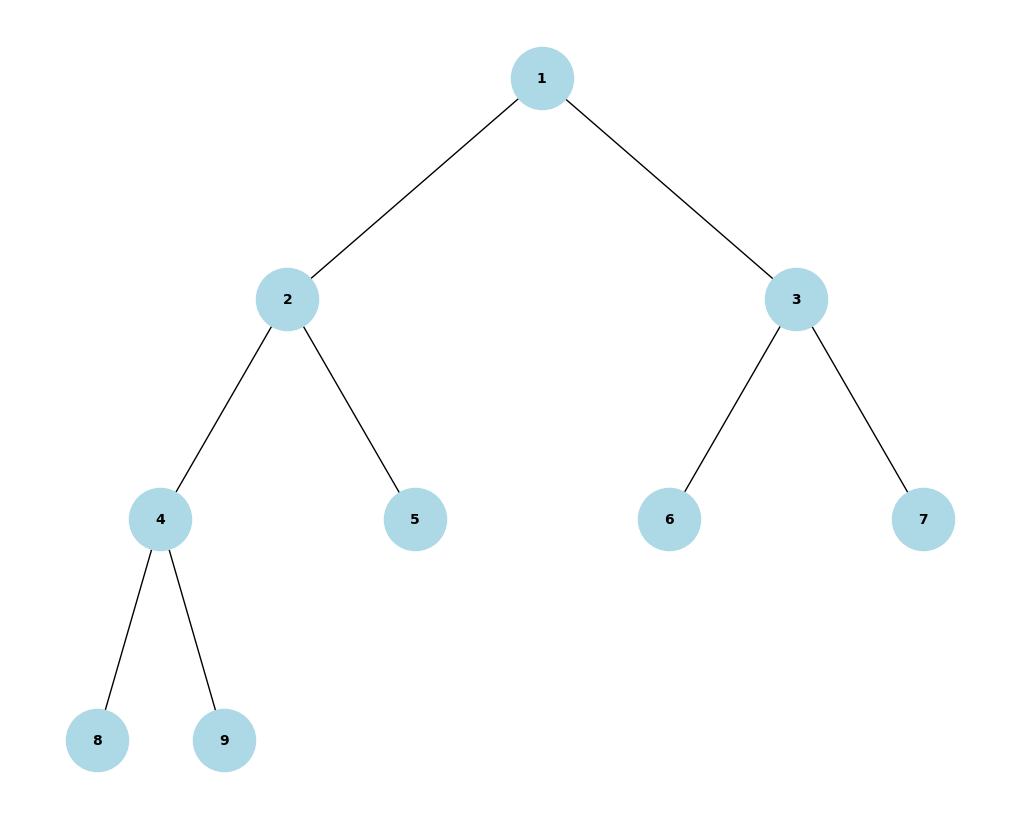

.                                                                                            [100%]
1 passed in 0.09s


In [18]:
%%ipytest

from collections import deque


def preorder(root):
    if not root:
        return []
    stack = [root]
    res = []
    while stack:
        node = stack.pop()
        res.append(node.value)
        if node.right:
            stack.append(node.right)
        if node.left:
            stack.append(node.left)
    return res


def postorder(root):
    if not root:
        return []
    stack = [root]
    res = []
    while stack:
        node = stack.pop()
        res.append(node.value)
        if node.left:
            stack.append(node.left)
        if node.right:
            stack.append(node.right)
    res.reverse()
    return res


def inorder(root):
    curr = root
    stack = []
    res = []
    while curr or stack:
        if curr:
            stack.append(curr)
            curr = curr.left
        elif stack:
            node = stack.pop()
            res.append(node.value)
            curr = node.right
    return res


def tree_bfs(root):
    if not root:
        return []
    queue = deque([root])
    res = []
    while queue:
        node = queue.popleft()
        res.append(node.value)
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)
    return res


def test_tree():
    root = create_tree([1, 2, 3, 4, 5, 6, 7, 8, 9])
    import networkx as nx

    plot_tree(root)
    assert preorder(root) == [1, 2, 4, 8, 9, 5, 3, 6, 7]
    assert inorder(root) == [8, 4, 9, 2, 5, 1, 6, 3, 7]
    assert postorder(root) == [8, 9, 4, 5, 2, 6, 7, 3, 1]
    assert tree_bfs(root) == [1, 2, 3, 4, 5, 6, 7, 8, 9]

### DP on Trees

In [ ]:
import math


def is_balance(root):
    def dfs(node):
        if not node:
            return True, 0
        is_left_balance, left_height = dfs(node.left)
        is_right_balance, right_height = dfs(node.right)
        return (
            abs(left_height - right_height) <= 1
            and is_left_balance
            and is_right_balance,
            max(left_height, right_height) + 1,
        )

    return dfs(root)[0]


def is_bst(root):
    def dfs(node):
        if not node:
            return True, math.inf, -math.inf
        is_left_bst, left_min, left_max = dfs(node.left)
        is_right_bst, right_min, right_max = dfs(node.right)
        return (
            is_left_bst and is_right_bst and left_max < node.value < right_min,
            min(node.value, left_min),
            max(node.value, right_max),
        )

    return dfs(root)[0]

### LCA(Lowest Common Ancestor)

In [4]:
%%ipytest


def lca(root, node1, node2):
    if not root or root == node1 or root == node2:
        return root
    left = lca(root.left, node1, node2)
    right = lca(root.right, node1, node2)
    if left and right:
        return root
    return left if left else right


def test_lca():
    values = [3, 5, 1, 6, 2, 0, 8, None, None, 7, 4]
    root = create_tree(values)

    node5 = root.left
    node1 = root.right
    node6 = node5.left
    node2 = node5.right
    node7 = node2.left
    node4 = node2.right
    node0 = root.right.left
    node8 = root.right.right

    assert lca(root, node5, node1) == root
    assert lca(root, node6, node4) == node5
    assert lca(root, node7, node4) == node2
    assert lca(root, node6, node7) == node5
    assert lca(root, node0, node8) == node1
    assert lca(root, node5, node5) == node5

.                                                                                            [100%]
1 passed in 0.00s


### Serialization and Deserialization

In [ ]:
from collections import deque


def serialize(root):
    if not root:
        return "#"
    return str(root.value) + "," + serialize(root.left) + "," + serialize(root.right)


def deserialize(s):
    queue = deque(s.split(","))

    def build():
        if not queue:
            return None
        v = queue.popleft()
        if v == "#":
            return None
        else:
            root = BinaryTreeNode(int(v))
            root.left = build()
            root.right = build()
            return root

    return build()

## Graph

### Topological Sort

In [ ]:
from collections import defaultdict, deque


def topo_sort(edges, n):
    indegree = defaultdict(int)
    graph = defaultdict(list)
    for u, v in edges:
        indegree[v] += 1
        graph[u].append(v)
    queue = deque()
    for u in range(n):
        if indegree[u] == 0:
            queue.append(u)

    res = []
    count = 0
    while queue:
        u = queue.popleft()
        res.append(u)
        count += 1
        for v in graph[u]:
            indegree[v] -= 1
            if indegree[v] == 0:
                queue.append(v)

    return res if count == n else None

### Union Find

In [5]:
class UnionFind:
    def __init__(self, n):
        self.parents = list(range(n))

    def find(self, i):
        if self.parents[i] != i:
            self.parents[i] = self.find(self.parents[i])
        return self.parents[i]

    def union(self, i, j):
        x = self.find(i)
        y = self.find(j)
        if x != y:
            self.parents[x] = y

### MST (Minimum Spanning Tree)

In [ ]:
import heapq
from collections import defaultdict


def kruskal(edges, n):
    edges.sort(key=lambda e: e[2])
    total_weight = 0
    mst_edges = []
    uf = UnionFind(n)
    for u, v, w in edges:
        if uf.find(u) != uf.find(v):
            total_weight += w
            mst_edges.append((u, v, w))
            uf.union(u, v)
        if len(mst_edges) == n - 1:
            break
    if len(mst_edges) < n - 1:
        return None
    return total_weight, mst_edges


def prim(edges, n):
    graph = defaultdict(list)
    for u, v, w in edges:
        graph[u].append((v, w))
        graph[v].append((u, w))
    heap = []
    for v, w in graph[0]:
        heapq.heappush(heap, (w, 0, v))
    visited = [False] * n
    visited[0] = True

    total_weight = 0
    mst_edges = []
    while heap:
        w, u, v = heapq.heappop(heap)
        if not visited[v]:
            total_weight += w
            mst_edges.append((u, v, w))
            visited[v] = True
            if len(mst_edges) == n - 1:
                break
            for vv, ww in graph[v]:
                if not visited[vv]:
                    heapq.heappush(heap, (ww, v, vv))
    if len(mst_edges) != n - 1:
        return None
    return total_weight, mst_edges

### Dijkstra's Algorithm

In [ ]:
import heapq
import math
from collections import defaultdict


def dijkstra(edges, n, start):
    graph = defaultdict(list)
    for u, v, w in edges:
        graph[u].append((v, w))
        graph[v].append((u, w))
    distances = [math.inf] * n
    distances[start] = 0
    heap = [(0, start)]

    while heap:
        d, u = heapq.heappop(heap)
        if d > distances[u]:
            continue
        for v, w in graph[u]:
            if d + w < distances[v]:
                distances[v] = d + w
                heapq.heappush(heap, (distances[v], v))
    return distances

## Trie

In [11]:
%%ipytest


class Trie:
    class TrieNode:
        def __init__(self):
            self.children = {}
            self.pass_count = 0
            self.end_count = 0

    def __init__(self):
        self.root = Trie.TrieNode()

    def insert(self, word):
        p = self.root
        p.pass_count += 1
        for c in word:
            if c not in p.children:
                p.children[c] = Trie.TrieNode()
            p = p.children[c]
            p.pass_count += 1
        p.end_count += 1

    def has(self, word):
        p = self.root
        for c in word:
            if c not in p.children:
                return False
            p = p.children[c]
        return p.end_count > 0

    def has_prefix(self, prefix):
        p = self.root
        for c in prefix:
            if c not in p.children:
                return False
            p = p.children[c]
        return True

    def delete(self, word):
        if not self.has(word):
            return
        p = self.root
        p.pass_count -= 1
        if p.pass_count == 0:
            p.children.clear()
            return
        for c in word:
            p.children[c].pass_count -= 1
            if p.children[c].pass_count == 0:
                del p.children[c]
                return
            p = p.children[c]
        p.end_count -= 1


def test_trie():
    t = Trie()
    t.insert("hello")
    t.insert("help")
    t.delete("hello")

    assert not t.has("hello")
    assert t.has("help")

.                                                                                            [100%]
1 passed in 0.00s


## Greedy

## Backtrack

### N-Queen

In [28]:
%%ipytest


def n_queen(n):
    def dfs(mask, cols, left_diags, right_diags):
        if cols == mask:
            return 1
        count = 0
        pos = mask & (~(cols | left_diags | right_diags))
        while pos:
            right_most = pos & -pos
            count += dfs(
                mask,
                cols | right_most,
                (left_diags | right_most) << 1,
                (right_diags | right_most) >> 1,
            )
            pos -= right_most
        return count

    return dfs((1 << n) - 1, 0, 0, 0)


def test_n_queue():
    assert n_queen(3) == 0
    assert n_queen(8) == 92

.                                                                                            [100%]
1 passed in 0.00s


### Subsets

In [31]:
%%ipytest


def find_subsets(arr):
    res = []

    def dfs(i, path=[]):
        if i == len(arr):
            res.append(path[:])
            return
        path.append(arr[i])
        dfs(i + 1, path)
        path.pop()
        dfs(i + 1, path)

    dfs(0)
    return res


def test_find_subsets():
    assert find_subsets([1, 2, 3]) == [
        [1, 2, 3],
        [1, 2],
        [1, 3],
        [1],
        [2, 3],
        [2],
        [3],
        [],
    ]

.                                                                                            [100%]
1 passed in 0.00s


### Permutations

In [47]:
%%ipytest


def find_permutations(arr):
    res = []

    def dfs(i):
        if i == len(arr):
            res.append(arr[:])
        for j in range(i, len(arr)):
            arr[i], arr[j] = arr[j], arr[i]
            dfs(i + 1)
            arr[i], arr[j] = arr[j], arr[i]

    dfs(0)
    return res


def test_find_permutations():
    assert find_permutations([1, 2, 3]) == [
        [1, 2, 3],
        [1, 3, 2],
        [2, 1, 3],
        [2, 3, 1],
        [3, 2, 1],
        [3, 1, 2],
    ]

.                                                                                            [100%]
1 passed in 0.00s


## Dynamic Programming

In [62]:
%%ipytest


def knapsack(weight_limit, weights, profits):
    n = len(weights)
    dp = [[0] * (weight_limit + 1) for _ in range(n + 1)]
    for i in range(n - 1, -1, -1):
        for j in range(weight_limit + 1):
            dp[i][j] = dp[i + 1][j]
            if weights[i] <= j:
                dp[i][j] = max(dp[i][j], dp[i + 1][j - weights[i]] + profits[i])

    return dp[0][weight_limit]


def test_knapsack():
    assert knapsack(4, [4, 5, 1], [1, 2, 3]) == 3

.                                                                                            [100%]
1 passed in 0.01s
